In [1]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.1/10.9 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.9 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.9 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.9 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/10.9 MB 8.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.9 MB 7.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.9 MB 7.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.9 MB 6.7 MB/s eta 0:00:02
   -------

In [2]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 108.9 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 217.9 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 401.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 697.2 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 865.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Project Details
In this project we will be focusing on cars dataset which is from kaggle.
We will develop a predictive model using linear regression to estimate the Manufacturer's Suggested Retail Price of cars based on their features.
It describes almost 12000 car models sold in the United States between 1990 and 2018, including some features and market prices.

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

#feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


sns.set_style("darkgrid")

### Explore Data and Data cleaning Challenges 

#### 1. Open an empty notebook and read in the car dataset.

In [5]:
# read data
df = pd.read_csv('data/car_data.csv')

###### show the head of data
df.head()

#### 2. Check information about the data. How many numerical and categorical variables exist in the dataset?

In [4]:
# print information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

At first glance, there are 8 numerical and 7 categorical variables in the dataset regarding the type of values. While `Year` can be categorical or numerical and `Number of Doors` and `Engine Cylinders` would be considered categorical.  

#### 3. Check the statistical description of the data. What are the maximum and minimum prices of the cars? What is the standard deviation of the city fuel consumption of the cars?

In [5]:
# print statistical infomration about data
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#### 4. Check How many cars from each brand are in the dataset

In [6]:
df['Make'].value_counts()

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

#### 5. Check the column name of the dataset. Is there any inconsistency in the column names?  Is there a way to resolve the inconsistency in this case?

In [7]:
# check column name
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

Some inconsistencies are present regarding the use of uppercase and lowercase letters, as well as the use of spacing and underscore to separate words.

In [6]:
# modify columns name - make everything lowercase and use undescore to seperate words
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

The column names are way too long. Let's shorten them

In [7]:
# use shorten name
df.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp',
                            'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission',
                            'driven_wheels' : 'drive', 'number_of_doors' : 'doors',
                            'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style',
                             'msrp' : 'price'}, inplace = True)

#### 6. Check the duplicate rows. What should we do about the duplicate data?

In [8]:
# check duplicates
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  715


In [12]:
df[df.duplicated()== True]

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,market,size,style,highway_mpg,city_mpg,popularity,price
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [9]:
# remove duplicates
df = df.drop_duplicates()

In [14]:
# check the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          11199 non-null  object 
 1   model         11199 non-null  object 
 2   year          11199 non-null  int64  
 3   fuel_type     11196 non-null  object 
 4   hp            11130 non-null  float64
 5   cylinders     11169 non-null  float64
 6   transmission  11199 non-null  object 
 7   drive         11199 non-null  object 
 8   doors         11193 non-null  float64
 9   market        7823 non-null   object 
 10  size          11199 non-null  object 
 11  style         11199 non-null  object 
 12  highway_mpg   11199 non-null  int64  
 13  city_mpg      11199 non-null  int64  
 14  popularity    11199 non-null  int64  
 15  price         11199 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [15]:
df.to_csv('./data/car_data_cleaned.csv',index=False)

In [16]:
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  0


#### 7. Check data for null values. Remove the rows with missing values from the dataframe.

In [17]:
# check missing values
df.isnull().sum()

make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64

In [18]:
# Dropping null values is one option, but it causes loosing some data. Therefore we will deal with the null values differently later
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7735 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          7735 non-null   object 
 1   model         7735 non-null   object 
 2   year          7735 non-null   int64  
 3   fuel_type     7735 non-null   object 
 4   hp            7735 non-null   float64
 5   cylinders     7735 non-null   float64
 6   transmission  7735 non-null   object 
 7   drive         7735 non-null   object 
 8   doors         7735 non-null   float64
 9   market        7735 non-null   object 
 10  size          7735 non-null   object 
 11  style         7735 non-null   object 
 12  highway_mpg   7735 non-null   int64  
 13  city_mpg      7735 non-null   int64  
 14  popularity    7735 non-null   int64  
 15  price         7735 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.0+ MB


### EDA 

#### 1. Separate the features (`X`) and label (`y`).

In [20]:
# define X and y
X = df.drop(['price'],axis=1)
y = df['price']

In [22]:
X

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,market,size,style,highway_mpg,city_mpg,popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204


In [25]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: price, Length: 7735, dtype: int64

In [26]:
type(y)

pandas.core.series.Series

#### 2. Split the dataframe into training and test data

In [30]:
# split the dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

#### 4. Recombine the train features (`X_train`) and label (`y_train`) in one dataframe. As we analyze training data, we need to combine them into one datafra

In [28]:
# recombine the X_train and y_train
df_train = pd.concat([X_train,y_train],axis=1)
df_train.head()

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,market,size,style,highway_mpg,city_mpg,popularity,price
3358,Mazda,CX-5,2015,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,32,25,586,27970
9885,Chevrolet,Spark,2017,regular unleaded,98.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,29,1385,16325
7880,Audi,Q7,2015,diesel,240.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Diesel",Large,4dr SUV,28,19,3105,53400
6203,Dodge,Journey,2016,regular unleaded,283.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,24,16,1851,30895
1054,Audi,A3,2017,premium unleaded (recommended),220.0,4.0,AUTOMATED_MANUAL,all wheel drive,2.0,Luxury,Compact,Convertible,34,25,3105,40300


#### 5. Answer the following questions
##### - How does the car price distribution look?

array([[<Axes: title={'center': 'price'}>]], dtype=object)

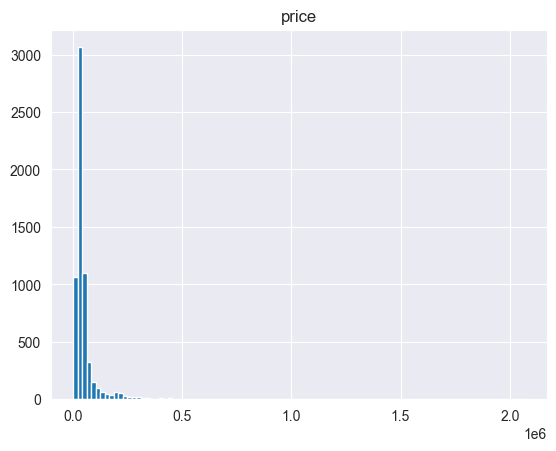

In [31]:
df_train.hist(column='price', bins=100)


##### - What is the effect of engine horsepower on car price?

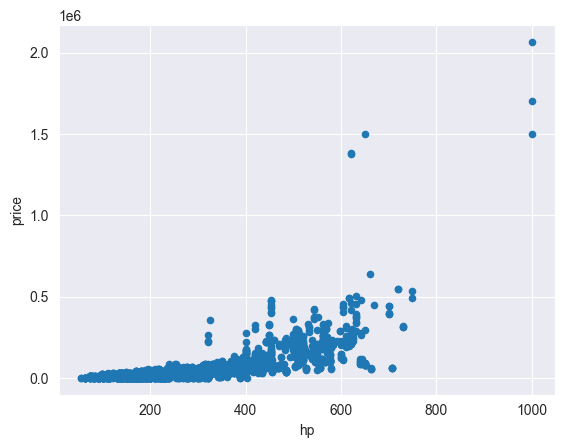

In [32]:
# relation (correlation) between horse power and price
df_train.plot(x='hp',y='price', kind="scatter");

##### - How does the average price change per year?

To make better visualisations we will use another library, which is seaborn. The syntax is very similar to plot()

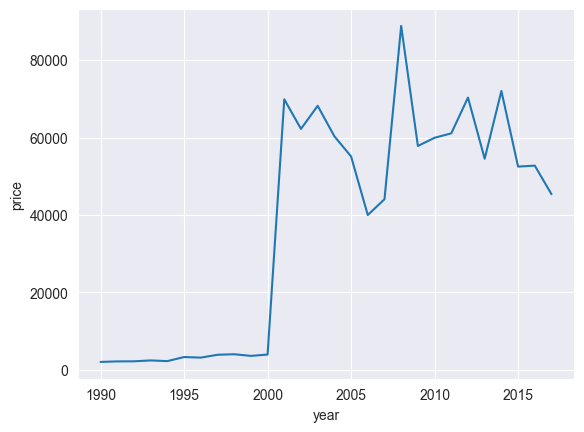

In [33]:
# mean of price over time
sns.lineplot(df_train,x='year',y='price',errorbar=None);

#### bonus on the outliers: how to detect outliers and deal with them

### Linear Regression

#### 1. Subset the train dataframe to extract the numerical columns.(In this case, do not consider the popularity column.)

In [34]:
df_train_subset = df_train[['year','hp','cylinders','doors','highway_mpg','city_mpg','price']]

In [36]:
df_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6188 entries, 3358 to 11161
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         6188 non-null   int64  
 1   hp           6188 non-null   float64
 2   cylinders    6188 non-null   float64
 3   doors        6188 non-null   float64
 4   highway_mpg  6188 non-null   int64  
 5   city_mpg     6188 non-null   int64  
 6   price        6188 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 386.8 KB


#### 2. Generate a heatmap of the subset dataframe. Which feature has the highest correlation with the price column?

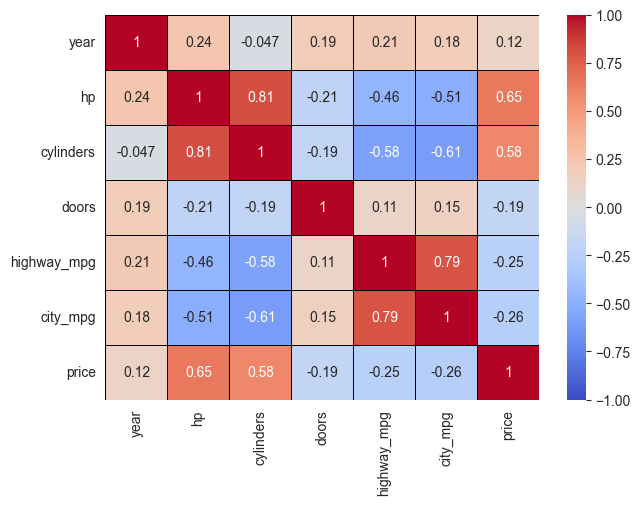

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
sns.heatmap(df_train_subset.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm', linewidths=0.5, linecolor='black');

hp has the highest correlation with price.

#### 3.Using that feature from step. 2, build a simple linear regression model with price as the target variable. Calculate R2.

In [38]:
# define the target and independent variable
X1_train = df_train_subset[['hp']]
y1_train = df_train_subset['price']

# fit linear regression model to the feature with the highest correlation
model1 = LinearRegression().fit(X1_train, y1_train)

#calculate R2
model1_r2 = model1.score(X1_train, y1_train)
print(f"model1 R2 = {model1_r2}")

model1 R2 = 0.42185432130007994


#### 4. Add four more additional features with high correlation to the price and repeat the previous step. Observe how R2 changes. How can this change be explained?

In [2]:
# define the target and independent variable
X2_train = df_train_subset[['hp','cylinders','city_mpg','highway_mpg','doors']]
y2_train = df_train_subset['price']

model2 = LinearRegression().fit(X2_train, y2_train)

#calculate R2
model2_r2 = model2.score(X2_train, y2_train)
print(f"model2 R2 = {model2_r2}")

NameError: name 'df_train_subset' is not defined

#### 5. Add the remaining feature and repeat the previous step. Does the model improve when the remeaning column is added as a feature?

In [40]:
# define the target and independent variable
X3_train = df_train_subset[['hp','cylinders','city_mpg','highway_mpg','doors','year']]
y3_train = df_train_subset['price']

model3 = LinearRegression().fit(X3_train, y3_train)

#calculate R2
model3_r2 = model3.score(X3_train, y3_train)
print(f"model3 R2 = {model3_r2}")

model3 R2 = 0.4488124456443111


### Car Dataset Metrics Challeneges

#### -  All car price range

In [1]:
print(f"across all cars, the price changes between {df['price'].min()} and {df['price'].max()}")

NameError: name 'df' is not defined

### Regression Error Metrics

In [ ]:
# calculate some error metrics for model3

# define X_test and y_test
X3_test = X_test[['hp','cylinders','city_mpg','highway_mpg','doors','year']]
y3_test = y_test

# make prediction
predicted3 = model3.predict(X3_test)

# put predicted and actual values in one dataframe
actual_vs_predicted_model3 = pd.DataFrame({'Actual': y3_test, 'Predicted':predicted3})
actual_vs_predicted_model3.head()

In [ ]:
# calculate MAE
MAE_model3 = mean_absolute_error(y_true=y3_test, y_pred=predicted3)
print(f'MAE of model3: {MAE_model3.round(2)}')
# calculate MSE
MSE_model3 = mean_squared_error(y_true=y3_test, y_pred=predicted3)
print(f'MSE of model3: {MSE_model3.round(2)}')
# calcualte RMSE
RMSE_model3 = MSE_model3**(1/2)
print(f'RMSE of model3: {RMSE_model3.round(2)}')


#### **Bonus:** The predictions indicate some negative prices, which are unreasonable. What is your explanation for this? What can be done to resolve this issue? 

One way you can avoid running into negative values is to log transform your target variable. You can convert it back to your actual scale by taking the exponential.


### Impute Missing Values Challenges

#### 1. Read the cleaned data you have already saved as part of the data cleaning challenge

Now, we are going to deal with the null values differently instead of dropping them.

In [2]:
# read the cleaned data
df = pd.read_csv('./data/car_data_cleaned.csv')
df.head()

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,market,size,style,highway_mpg,city_mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### 2. Check data for null values.

In [46]:
# check missing values
df.isnull().sum()

make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64

#### 3. Split the dataframe into training and test data

In [3]:
# define X and y
X = df.drop(['price'],axis=1)
y = df['price']

In [4]:
# split the dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

#### 4. Use the appropriate strategy that you have learned during the encounter to impute missing values for both the train and test datasets separately

- Drop the market column as it contains too much of the null values and also this feature doesn't have high importance regarding target feature which is price

In [5]:
X_train.drop('market',axis=1,inplace =True)
X_test.drop('market',axis=1,inplace =True)

- impute missing values in the numerical features (hp) with the mean

In [6]:
# we fit it into the train values not to the test values!!!
imp_num = SimpleImputer( strategy='mean')
imp_num.fit(X_train[['hp']])

X_train['hp']= imp_num.transform(X_train[['hp']])
X_test['hp']= imp_num.transform(X_test[['hp']])

- impute missing values in the categorical features (fuel_type) with the mode

In [7]:
# we fit it into the train values not to the test values!!!
imp_cat = SimpleImputer(strategy = 'most_frequent')

In [8]:
imp_cat.fit(X_train[['fuel_type']])

SimpleImputer(strategy='most_frequent')

In [9]:
X_train['fuel_type']= imp_cat.transform(X_train[['fuel_type']]).ravel()

#for the categorical values it gave me a value error. I flatten the data

In [10]:

X_test['fuel_type']= imp_cat.transform(X_test[['fuel_type']]).ravel()

- impute missing values in the ordinal features (doors,cylinders) with the median

In [11]:
imp_ord = SimpleImputer(strategy = 'median')

imp_ord.fit(X_train[['doors','cylinders']])

X_train[['doors','cylinders']]= imp_ord.transform(X_train[['doors','cylinders']])
X_test[['doors','cylinders']]= imp_ord.transform(X_test[['doors','cylinders']])

In [12]:
# check missing values again
X_train.isnull().sum()

make            0
model           0
year            0
fuel_type       0
hp              0
cylinders       0
transmission    0
drive           0
doors           0
size            0
style           0
highway_mpg     0
city_mpg        0
popularity      0
dtype: int64

In [ ]:
X_test.isnull().sum()

### Linear Regression With Categorical Features Challenges

Encode the categorical features. This is very important as machine learning does not deal with those. Therefore, we will use scikit-learn for the purpose of encoding these categorical features. Also, we can do it using pandas ```pd.get_dummies```

#### 1. Subset the dataframe from the previous challenge to extract the categorical columns.

In [13]:
cat_features = ['make', 'model', 'fuel_type','cylinders','transmission', 'drive','doors', 'size', 'style']

#### 2. apply one-hot encoder to the categorical subset of the train dataset 

In [14]:
encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)
# fit the encoder to train data
encoder.fit(X_train[cat_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [15]:
# transform the train datasets
X_train_cat_encoded = encoder.transform(X_train[cat_features])

In [16]:
X_train_cat_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Convert back the result object into pandas dataframe

In [17]:
# get the feature names from the encoder
feature_names = encoder.get_feature_names_out(cat_features)
# convert back to pandas DataFrames
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=feature_names,index=X_train.index)
X_train_cat_encoded_df.head()
X_train_cat_encoded_df.isnull().sum()

make_Acura                  0
make_Alfa Romeo             0
make_Aston Martin           0
make_Audi                   0
make_BMW                    0
                           ..
style_Passenger Minivan     0
style_Passenger Van         0
style_Regular Cab Pickup    0
style_Sedan                 0
style_Wagon                 0
Length: 1002, dtype: int64

#### 4. Add numerical features to the encoded dataframe from the previous step

In [18]:
# add numerical features to the encoded dataframes
num_features = ['year','hp','highway_mpg','city_mpg','popularity']
X_train_full_encoded = pd.concat([X_train_cat_encoded_df,X_train[num_features]],axis=1) 
X_train_full_encoded.head()

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Passenger Minivan,style_Passenger Van,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,highway_mpg,city_mpg,popularity
982,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2015,170.0,33,23,3105
9449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1992,111.0,32,22,210
2900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016,185.0,33,26,2202
10293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,381.0,17,13,2031
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,138.0,37,27,1720


#### 5. Repeat the above steps on the test dataset

In [19]:
# transform the train and test datasets
#we fit everything on the train dataset and we transform the test dataset with the same encoder
X_test_cat_encoded = encoder.transform(X_test[cat_features])

In [20]:
# convert back to pandas DataFrames
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=feature_names,index=X_test.index)

In [21]:
# add numerical features to the encoded dataframes
X_test_full_encoded = pd.concat([X_test_cat_encoded_df,X_test[num_features]],axis=1)

#### 6. Build a linear regression model using the encoded categorical and numerical features. Observe how R2 has changed from the last model you constructed using only numerical features.

In [22]:
# fit a linear regression model with categorical features

model_with_cat = LinearRegression().fit(X_train_full_encoded, y_train)

#calculating R2
model_with_cat_r2 = model_with_cat.score(X_train_full_encoded, y_train)
print(f"model2 R2 = {model_with_cat_r2}")

model2 R2 = 0.9878316752116525


- By considering categorical features in the linear model, the model is significantly enhanced in performance.

#### 7. Make predictions and plot predicted and actual values in one scatter plot.  

In [23]:
# make prediction
predicted_with_cat = model_with_cat.predict(X_test_full_encoded)
predicted_with_cat

# put predicted and actual value in one dataframe
actual_vs_predicted_model_with_cat = pd.DataFrame({'Actual': y_test, 'Predicted':predicted_with_cat})

actual_vs_predicted_model_with_cat

,Actual,Predicted
4695,26840,28331.520614
2179,2000,-1085.094225
9583,31625,33907.468094
7135,449525,436744.189316
3757,42320,44494.868263
...,...,...
5805,18995,21659.589502
7679,35100,32821.886934
5581,18695,20178.176415
6189,2000,-3559.948791


### Linear Regression With Scaled Numerical Feature Challenge

#### 1. Apply `StandardScaler()` to the numerical subset of the train dataset

In [ ]:
# select numerical features
num_features = ['year','hp','highway_mpg','city_mpg','popularity']
# initiate the StandardScaler
scaler = StandardScaler()

# fit StandardScaler on the numerical features of the train dataset
scaler.fit(X_train_full_encoded[num_features])

# transofrm the train dataset
X_train_num_columns_scaled = scaler.transform(X_train_full_encoded[num_features])

#### 2. Create a dataframe with encoded categorical (from the previous challenge) and scaled numerical features for train dataset

In [ ]:
# put the scaled numerical featurs in the full traindataset
X_train_full_encoded_scaled = X_train_full_encoded.copy()
X_train_full_encoded_scaled[num_features] = X_train_num_columns_scaled 
# check full train dataset
X_train_full_encoded_scaled.head()

#### 3. Repeat the above steps on the train dataset

In [ ]:
# transofrm the test dataset
X_test_num_columns_scaled = scaler.transform(X_test_full_encoded[num_features])
# put the scaled numerical featurs in the full test dataset
X_test_full_encoded_scaled = X_test_full_encoded.copy()
X_test_full_encoded_scaled[num_features] = X_test_num_columns_scaled 
# check full test dataset
X_test_full_encoded_scaled.head()

#### 4. Build a linear regression model using the encoded categorical and scaled numerical features. Observe how R2 has changed from the last model you constructed in the previous challenge. How do you explain it?

In [ ]:
# fit a linear regression model with categorical  and scaled numerical features
model_with_cat_scaled = LinearRegression().fit(X_train_full_encoded_scaled, y_train)

#calculating R2
model_with_cat_scaled_r2 = model_with_cat_scaled.score(X_train_full_encoded_scaled, y_train)
print(f"model R2  = {model_with_cat_scaled_r2}")

In [ ]:
# make prediction
predicted_with_cat_scaled = model_with_cat_scaled.predict(X_test_full_encoded_scaled)
predicted_with_cat_scaled

# put predicted and actual value in one dataframe
actual_vs_predicted_model_with_cat_scaled = pd.DataFrame({'Actual': y_test, 'Predicted':predicted_with_cat_scaled})

# plot predicted and actual value in one scatter plot
sns.scatterplot(actual_vs_predicted_model_with_cat_scaled,x='Actual',y='Predicted')
plt.ylim([-10000,600000])
plt.xlim([-10000,600000])

Scaling the numerical features does not change the model's performance in terms of train R2. As all numerical features have the same magnitude, scaling does not have a significant impact on the model's performance. 